In [2]:
from numpy.random import default_rng # numpy random value generator
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import HTML,Image
plt.style.use("dark_background")
%matplotlib inline

In [3]:
numberParticle = 70
randomNumberGenerator = default_rng() # random number generator

In [4]:
randomNumberGenerator.random(numberParticle)

array([0.23585857, 0.82719389, 0.89624349, 0.05209344, 0.27314189,
       0.54213388, 0.97448483, 0.05079012, 0.52126829, 0.65497126,
       0.21754449, 0.1232495 , 0.3430544 , 0.51506505, 0.88922725,
       0.4699334 , 0.63842026, 0.02027029, 0.9840372 , 0.7797725 ,
       0.59315485, 0.18337119, 0.44336053, 0.95720476, 0.56438331,
       0.28607608, 0.89710256, 0.63473133, 0.00640214, 0.28844193,
       0.75436491, 0.97188699, 0.71991073, 0.4685814 , 0.07556731,
       0.09885592, 0.01962771, 0.54110585, 0.87271284, 0.24523423,
       0.4998488 , 0.24941192, 0.07634711, 0.3747898 , 0.88143941,
       0.60651975, 0.20332433, 0.00650571, 0.43218198, 0.81680471,
       0.68528347, 0.49551687, 0.966257  , 0.59982084, 0.43046298,
       0.86844146, 0.30925259, 0.26857649, 0.1971083 , 0.55895036,
       0.28227712, 0.59577569, 0.42463139, 0.50953022, 0.53649824,
       0.25910341, 0.68470541, 0.16681477, 0.20127058, 0.84442572])

# Particle Movements

In [5]:
positions = (70*randomNumberGenerator.random(numberParticle*2)-70).reshape(numberParticle,2) # 2-D array, x and y

In [6]:
velocities = (0.2*randomNumberGenerator.random(numberParticle*2)).reshape(numberParticle,2) # 2-D for velocities, x and y

In [7]:
particleSize = 100*randomNumberGenerator.random(numberParticle)+10 # balls with random sizes

In [8]:
particleColors = randomNumberGenerator.random([numberParticle,4])

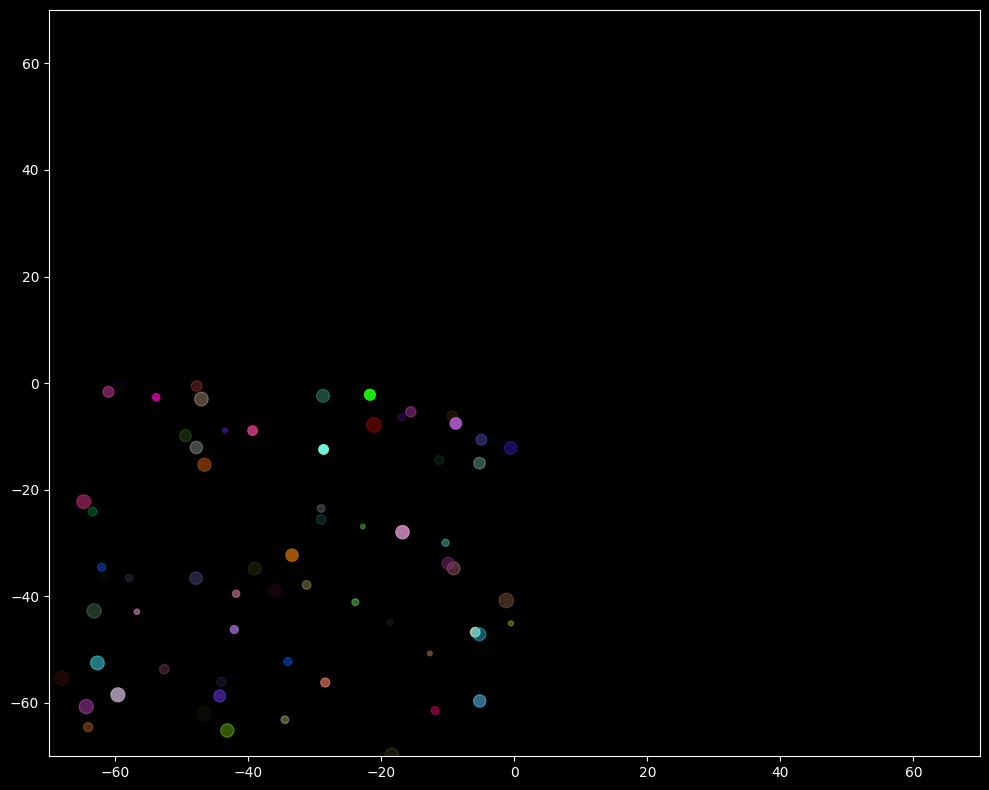

In [9]:
figure = plt.figure(figsize=(10,8))
ax = plt.axes(xlim=(-numberParticle,numberParticle),ylim=(-numberParticle,numberParticle))
circles = plt.scatter(positions[:,0],positions[:,1],marker="o",s=particleSize,c=particleColors)
plt.tight_layout()
plt.show()

In [10]:
def AnimateParticles(frame):
  global positions
  positions += velocities
  bounce = abs(positions) > numberParticle
  velocities[bounce] = -velocities[bounce]
  circles.set_offsets(positions)
  return circles

In [11]:
animationFunction = animation.FuncAnimation(figure,AnimateParticles,frames=100,interval=100)
jsonHTML = animationFunction.to_jshtml()

In [12]:
HTML(jsonHTML)

Output hidden; open in https://colab.research.google.com to view.

In [13]:
animationFunction.save("particleMovement.gif",writer="pillow",fps=50)

In [14]:
Image(url="particleMovement.gif")

# Particle Collision

In [29]:
# Set up the initial parameters
numberParticle = 50
area_size = 50
max_velocity = 1
particle_diameter = 2  # Diameter of each particle
# Initialize random positions and velocities
np.random.seed(0)  # For reproducibility
positions = area_size*np.random.rand(numberParticle,2)-area_size/2
velocities = max_velocity*(2*np.random.rand(numberParticle,2)-1)

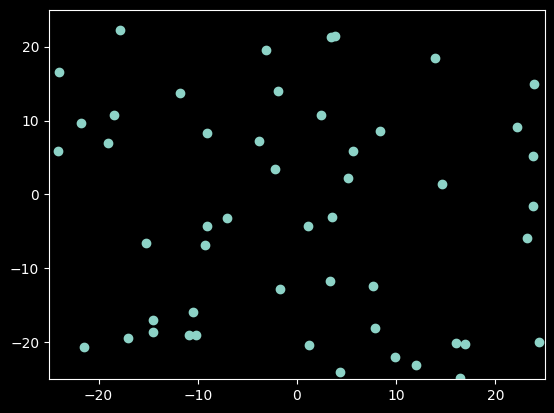

In [30]:
# Set up the matplotlib figure and axes
fig, ax = plt.subplots()
ax.set_xlim(-area_size/2,area_size/2)
ax.set_ylim(-area_size/2,area_size/2)
scatter = ax.scatter(positions[:, 0],positions[:, 1])

In [31]:
# Animation update function
def update(frame):
    global positions, velocities
    new_positions = []
    new_velocities = []
    # Update positions and check for boundary collisions
    for i, pos in enumerate(positions):
        new_pos = pos + velocities[i]
        if abs(new_pos[0]) > area_size/2 or abs(new_pos[1]) > area_size/2:
            velocities[i] *= -1
            new_pos = pos+velocities[i]
        new_positions.append(new_pos)
        new_velocities.append(velocities[i])
    # Convert to numpy arrays for vectorized operations
    new_positions = np.array(new_positions)
    new_velocities = np.array(new_velocities)
    # Check for collisions between particles
    removal_indices = set()
    for i in range(len(new_positions)):
        for j in range(i+1,len(new_positions)):
            if np.linalg.norm(new_positions[i]-new_positions[j]) < particle_diameter:
                removal_indices.update([i,j])
    # Remove collided particles
    if removal_indices:
        new_positions = np.delete(new_positions,list(removal_indices),axis=0)
        new_velocities = np.delete(new_velocities,list(removal_indices),axis=0)
    # Update global arrays
    positions = new_positions
    velocities = new_velocities
    # Update scatter plot
    scatter.set_offsets(positions)
    return scatter,

In [32]:
# Create and start the animation
ani = animation.FuncAnimation(fig,update,interval=50,frames=100)
jsonHTML = ani.to_jshtml()
plt.show()
HTML(jsonHTML)

In [33]:
ani.save("particleMovementCollision.gif",writer="pillow",fps=50)

In [34]:
Image(url="particleMovementCollision.gif")